In [1]:
import pandas as pd
df = pd.read_csv("../songtexte_bereinigt_gekuerzt.csv")

In [2]:
df

,Unnamed: 0,artist,song,text,number_of_tokens
0,0,ABBA,Ahe's My Kind Of Girl,look at her face it's a wonderful face and i...,741
1,1,ABBA,"Andante, Andante",take it easy with me please touch me gently ...,1381
2,2,ABBA,As Good As New,i'll never know why i had to go why i had to ...,1438
3,3,ABBA,Bang,making somebody happy is a question of give an...,1207
4,4,ABBA,Bang-A-Boomerang,making somebody happy is a question of give an...,1223
...,...,...,...,...,...
50827,57642,Ziggy Marley,Friend,i wanna thank you for the things you've done...,691
50828,57643,Ziggy Marley,G7,seven richest countries in the world them hav...,1443
50829,57644,Ziggy Marley,Generation,many generation have passed away fighting for...,1391
50830,57645,Ziggy Marley,Good Old Days,irie days come on play let the angels fly let...,858


In [3]:
df.shape

(50832, 5)

In [4]:
df.text

0        look at her face  it's a wonderful face  and i...
1        take it easy with me  please  touch me gently ...
2        i'll never know why i had to go  why i had to ...
3        making somebody happy is a question of give an...
4        making somebody happy is a question of give an...
                               ...                        
50827      i wanna thank you for the things you've done...
50828    seven richest countries in the world  them hav...
50829    many generation have passed away  fighting for...
50830    irie days come on play  let the angels fly let...
50831    power to the workers  more power  power to the...
Name: text, Length: 50832, dtype: object

In [5]:
df.artist.dropna()

0                ABBA
1                ABBA
2                ABBA
3                ABBA
4                ABBA
             ...     
50827    Ziggy Marley
50828    Ziggy Marley
50829    Ziggy Marley
50830    Ziggy Marley
50831    Ziggy Marley
Name: artist, Length: 50832, dtype: object

In [6]:
a = df.artist.unique()

In [7]:
a.shape

(415,)

Text(0.5, 0, 'Bands')

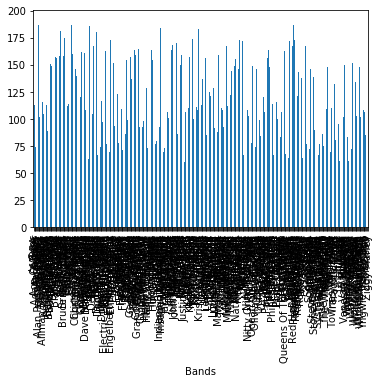

In [9]:
df.groupby('artist').song.count().plot(kind='bar').set_xlabel('Bands')

# UMAP

### Mit Songtexte_bereinigt_gekuerzt.csv und den 5 häufigsten Bands

In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
from collections import Counter

In [17]:
from yellowbrick.text import UMAPVisualizer

In [18]:
import pandas as pd
df = pd.read_csv("../songtexte_bereinigt_gekuerzt.csv")

In [19]:
c = Counter(df.artist).most_common()[5:]

In [21]:
sample = df.copy()
for el in c:
    sample = sample[sample.artist!=el[0]]
sample

,Unnamed: 0,artist,song,text,number_of_tokens
334,361,Alabama,Calling All Angels,calling calling all angels oh i'm calling c...,1425
335,362,Alabama,Can't Keep A Good Man Down,i thought it was forever i thought it would l...,1714
336,363,Alabama,Carolina Mountain Dew,somewhere in the mountains......... in norther...,1138
337,364,Alabama,Christmas In Dixie,by now in new york city there's snow on the g...,668
338,365,Alabama,Christmas In Your Arms,all my friends are asking me where i plan to s...,926
...,...,...,...,...,...
30544,34356,Gordon Lightfoot,Talking In Your Sleep,i heard you talking in your sleep is there ...,567
30545,34357,Gordon Lightfoot,Thank You For The Promises,thank you for the promises we make i know i c...,1258
30546,34358,Gordon Lightfoot,That Same Old Obsession,i come to this garden i come here to rest ea...,1142
30547,34359,Gordon Lightfoot,The First Time Ever I Saw Your Face,the first time ever i saw your face i thought...,795


In [22]:
labels = LabelEncoder().fit_transform(sample["text"])
labels = labels.reshape(labels.shape[0])
features = TfidfVectorizer().fit_transform(sample["artist"])
cluster = KMeans(n_clusters=8, random_state=None, n_jobs=None)
model = cluster.fit(features)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)


C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


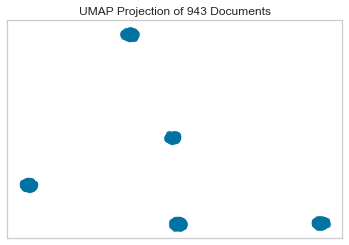

In [23]:
umap = UMAPVisualizer()
umap.fit(features)
umap.show()

### mit Sample_25_percent.csv und den 5 häufgisten Bands

In [24]:
df = pd.read_csv("../sample_25percent.csv")

In [25]:
c = Counter(df.artist).most_common()[5:]

In [27]:
sample = df.copy()
for el in c:
    sample = sample[sample.artist!=el[0]]
sample

,Unnamed: 0,artist,song,text,number_of_tokens
66,8438,Indigo Girls,Everything In It's Own Time,remember everything i told you keep it in you...,1098
74,7501,Hank Williams Jr.,The Cheatin' Hotel,when you check in the cheatin' hotel you'll b...,1905
131,8449,Indigo Girls,Heartache For Everyone,you spent five years saying you'd come my way ...,1768
133,7498,Hank Williams Jr.,Tee Tot Song,every mornin' ole tee tot come 'round settin'...,1313
136,33842,George Strait,Back To Bein' Me,i'm back to bein' me i'm back to bein' nobody...,916
...,...,...,...,...,...
12565,35292,Hank Williams Jr.,I've Been Around,i've been around. i used to sing songs that w...,841
12581,13057,Michael W. Smith,A Way,[verse 1] caught in a dream of where i want ...,968
12636,43840,Michael W. Smith,Above All,above all powers above all kings above all n...,1232
12652,33884,George Strait,I Met A Friend Of Yours Today,yes i know i'm late gettin' home tonight can...,796


In [28]:
labels = LabelEncoder().fit_transform(sample["text"])
labels = labels.reshape(labels.shape[0])
features = TfidfVectorizer().fit_transform(sample["artist"])
cluster = KMeans(n_clusters=8, random_state=None, n_jobs=None)
model = cluster.fit(features)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:972: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)


C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 5 separate connected components using meta-embedding (experimental)
  n_components
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


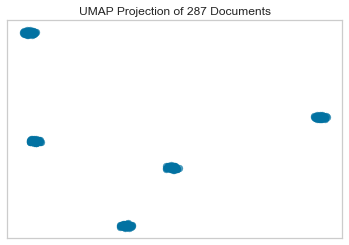

In [29]:
umap = UMAPVisualizer()
umap.fit(features)
umap.show()

### Mit Songtexte_bereinigt_gekuerzt.csv aber mit allen Bands 

In [30]:
df = pd.read_csv("../songtexte_bereinigt_gekuerzt.csv")

In [31]:
df.head(2)

,Unnamed: 0,artist,song,text,number_of_tokens
0,0,ABBA,Ahe's My Kind Of Girl,look at her face it's a wonderful face and i...,741
1,1,ABBA,"Andante, Andante",take it easy with me please touch me gently ...,1381


In [32]:
labels = LabelEncoder().fit_transform(df["text"])
labels = labels.reshape(labels.shape[0])
features = TfidfVectorizer().fit_transform(df["artist"])
cluster = KMeans(n_clusters=8, random_state=None, n_jobs=None)
model = cluster.fit(features)

C:\ProgramData\Anaconda3\lib\site-packages\umap\sparse.py:247: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\umap\utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
C:\ProgramData\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\ProgramData\Anaconda

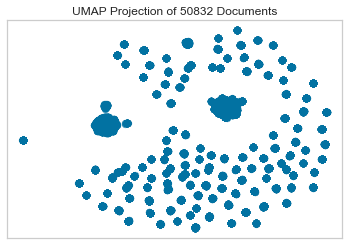

In [33]:
umap = UMAPVisualizer()
umap.fit(features)
umap.show()

### mit Sample_25_percent.csv aber mit allen Bands

In [34]:
df = pd.read_csv("../sample_25percent.csv")

In [35]:
df.head(2)

,Unnamed: 0,artist,song,text,number_of_tokens
0,20468,Van Halen,Take Your Whiskey Home,well my baby she don't want me around. she ...,1197
1,41605,Lil Wayne,Army Gunz,yeah yeah yeah (i got army gunz) yeah yeah ...,2860


In [36]:
labels = LabelEncoder().fit_transform(df["text"])
labels = labels.reshape(labels.shape[0])
features = TfidfVectorizer().fit_transform(df["artist"])
cluster = KMeans(n_clusters=8, random_state=None, n_jobs=None)
model = cluster.fit(features)

C:\ProgramData\Anaconda3\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\..\..\..\ProgramData\Anaconda3\lib\site-packages\umap\sparse.py", line 176:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 54 separate connected components using meta-embedding (experimental)
  n_components
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


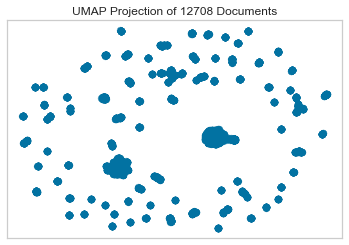

In [37]:
umap = UMAPVisualizer()
umap.fit(features)
umap.show()